# Assignement 1 ML

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 10)

# plotting the data

Text(0, 0.5, 'image label')

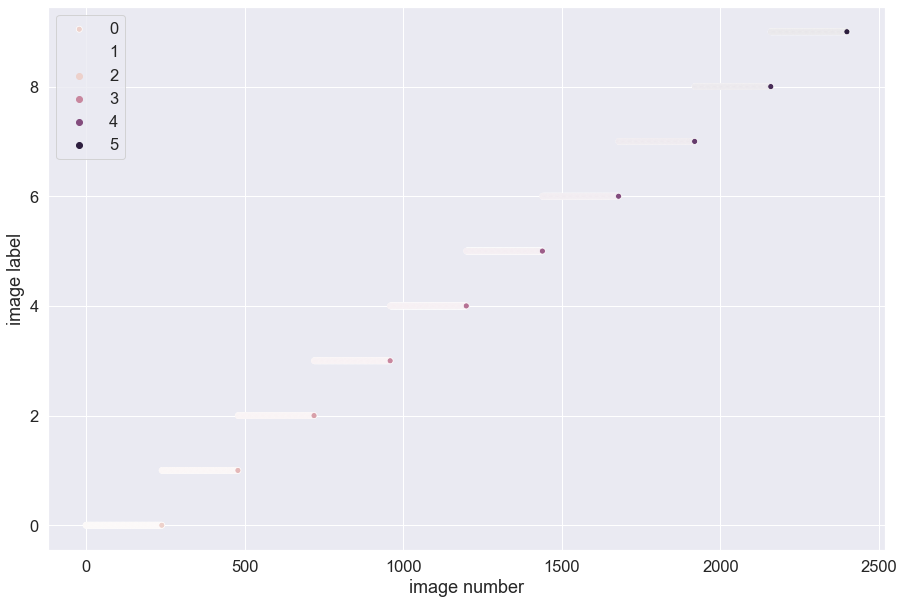

In [16]:
training_set = pd.read_csv('Train/Training Labels.txt', names = ['label'])
test_set = np.genfromtxt('Test/Test Labels.txt')
training_set.shape
training_set.reset_index(level=0, inplace=True)
training_set[['index', 'label']] = training_set[['index', 'label']].astype('int64')
x, y = training_set['index'], training_set['label']
plt.figure()
ax = sns.scatterplot(x='index', y="label", hue='label',data=training_set)
plt.legend(['0', '1', '2', '3', '4' ,'5' , '6', '7', '8', '9'])
plt.xlabel('image number')
plt.ylabel('image label')

In [17]:
def calculateInputMatrix():
    X = np.zeros((2400, 784))
    for i in range (0, X.shape[0]):
        img = plt.imread("Train/"+str(i+1)+'.jpg')
        rows, cols = img.shape 
        img_size = rows*cols
        img_1D_vector = img.reshape(img_size)
        X[i] = img_1D_vector
    return X

X = calculateInputMatrix()
#to be checked
X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
#print(X.shape)

In [24]:
def train(classLabel):
    class_label_range = classLabel*240
    t = np.genfromtxt('Train/Training Labels.txt')
    for j in range(0, t.shape[0]):
        if (t[j] == classLabel):
            t[j] = 1
        else:
            t[j] = 0
    X_trans = np.transpose(X)
    X_X_transpose_inv = np.linalg.pinv(np.dot(X_trans, X))
#     print(X_X_transpose_inv.shape)
#     print(X.shape)
#     print(X_trans.shape)
    eqt = np.dot(np.dot((X_X_transpose_inv), X_trans), t)
    return eqt

In [25]:
W = np.zeros((10, 785))
for i in range (0, 10):
    W[i] = train(i)

In [26]:
def classify(image):
    img = plt.imread(image)
    rows, cols = img.shape 
    img_size = rows*cols
    img_1D_vector = img.reshape(img_size)[:, None]
    #to be checked
    img_1D_vector = np.concatenate([np.ones((1,1)), img_1D_vector], axis=0)
    max = 0
    classed = 0
    for i in range (0, 10):
        curr_max = np.dot(np.transpose(W[i]), img_1D_vector)
        if (max < curr_max):
            max = curr_max
            classed = i
        #print(curr_max)
    return classed
#print(predicts[0].shape)
#print(classify("Test/200.jpg"))

# getting the confusion matrix of the prediction

In [27]:
conv_matrix = np.zeros((10, 10))
predictions = np.zeros((200, 1))
for i in range (0, 200):
    predictions[i] = classify('Test/'+str(i+1)+'.jpg')
predictions_df = pd.DataFrame(predictions, columns=["label"])
predictions_df.head(20)
for i in range (0, 10):
    ran = i*20
    counts = pd.DataFrame(predictions_df["label"][ran:ran+20].value_counts(), columns=["label"])
    counts.reset_index(level=0, inplace=True)
    counts.columns = ["label", "count"]
    for j in range(0, counts.shape[0]):
        val = counts["label"][j]
        count = counts["count"][j]
        conv_matrix[i][int(val)] = int(count)
        
        
conv_matrix_df = pd.DataFrame(conv_matrix, columns = ["predicted_0", "predicted_1", "predicted_2", "predicted_3", "predicted_4", "predicted_5", "predicted_6", "predicted_7", "predicted_8", "predicted_9"])
conv_matrix_df.head(10)

,predicted_0,predicted_1,predicted_2,predicted_3,predicted_4,predicted_5,predicted_6,predicted_7,predicted_8,predicted_9
0,19.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,3.0,11.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,17.0,0.0,1.0,0.0,0.0,2.0,0.0
4,0.0,0.0,0.0,0.0,17.0,1.0,0.0,1.0,0.0,1.0
5,0.0,0.0,0.0,1.0,0.0,14.0,1.0,0.0,2.0,2.0
6,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0
7,0.0,0.0,1.0,1.0,0.0,0.0,0.0,15.0,0.0,3.0
8,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,15.0,1.0
9,1.0,0.0,0.0,1.0,1.0,1.0,0.0,4.0,0.0,12.0


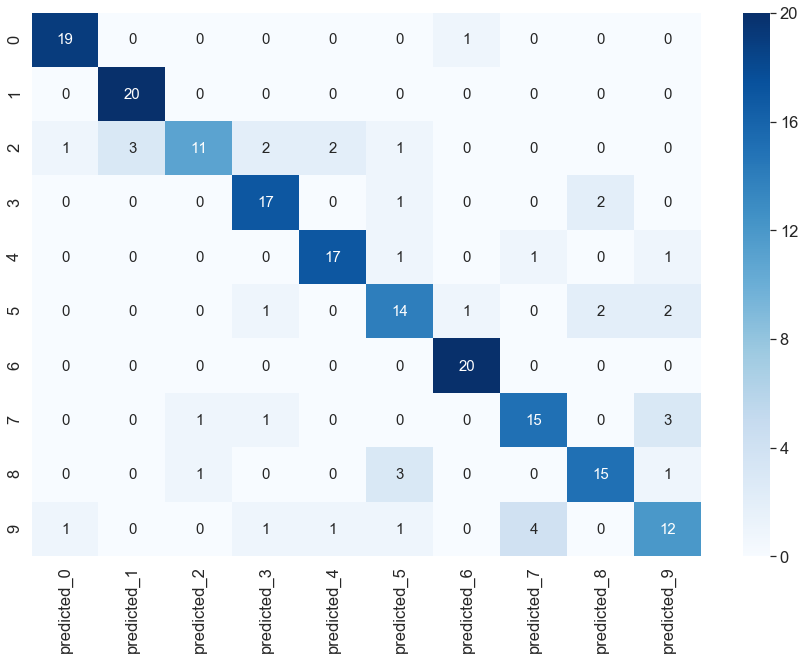

In [29]:
sns.set(font_scale=1.5)
ax = sns.heatmap(conv_matrix_df, cmap="Blues", annot=True, annot_kws={"size": 15})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.savefig('Confusion'+'.jpg')

In [9]:
performance = np.sum(predictions - test_set)**2
print(performance)

1000000.0


In [28]:
accuracy = 0
for i in range(0, 200):
    if(predictions[i] == test_set[i]):
        accuracy +=1
print('accuracy is:' + str((accuracy/200)*100) + '%')

accuracy is:80.0%
